In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [7]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
model.fit(X1, y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [8]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [12]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
scores.mean()

np.float64(0.96)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [15]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10-1./(X.ravel()+0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

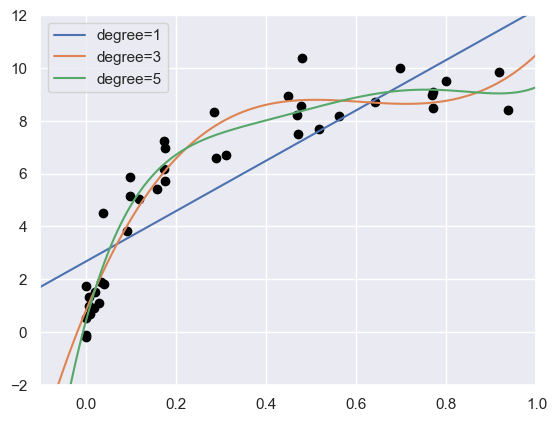

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in  [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Note: you may need to restart the kernel to use updated packages.


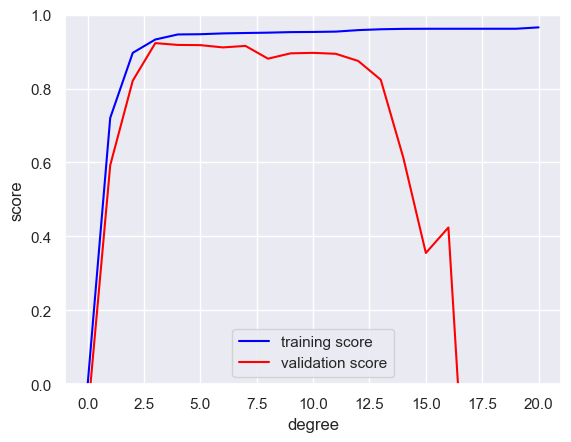

In [20]:
%pip install scikit-learn

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree', param_range=degree, cv=7
)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

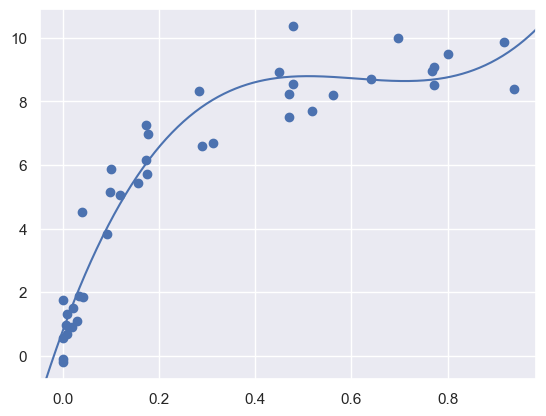

In [21]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

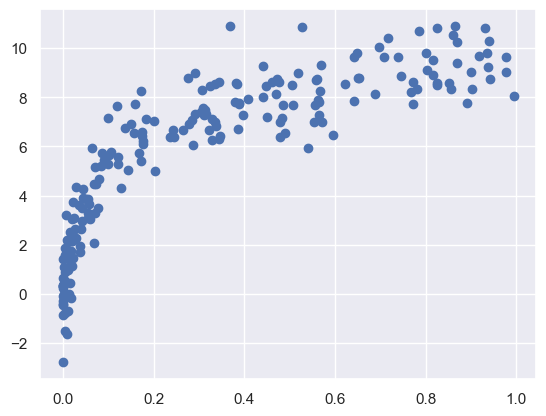

In [22]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

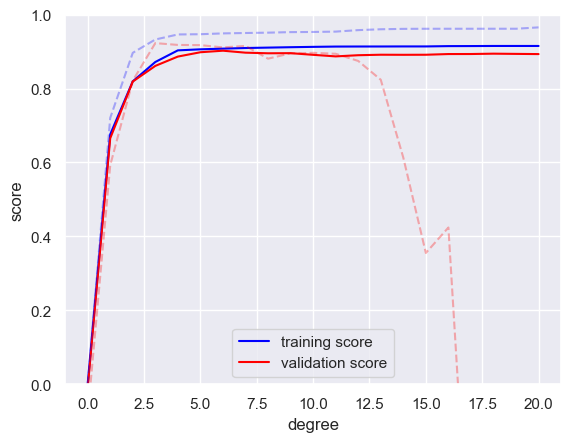

In [24]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), X2, y2,
    param_name='polynomialfeatures__degree', param_range=degree, cv=7
)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

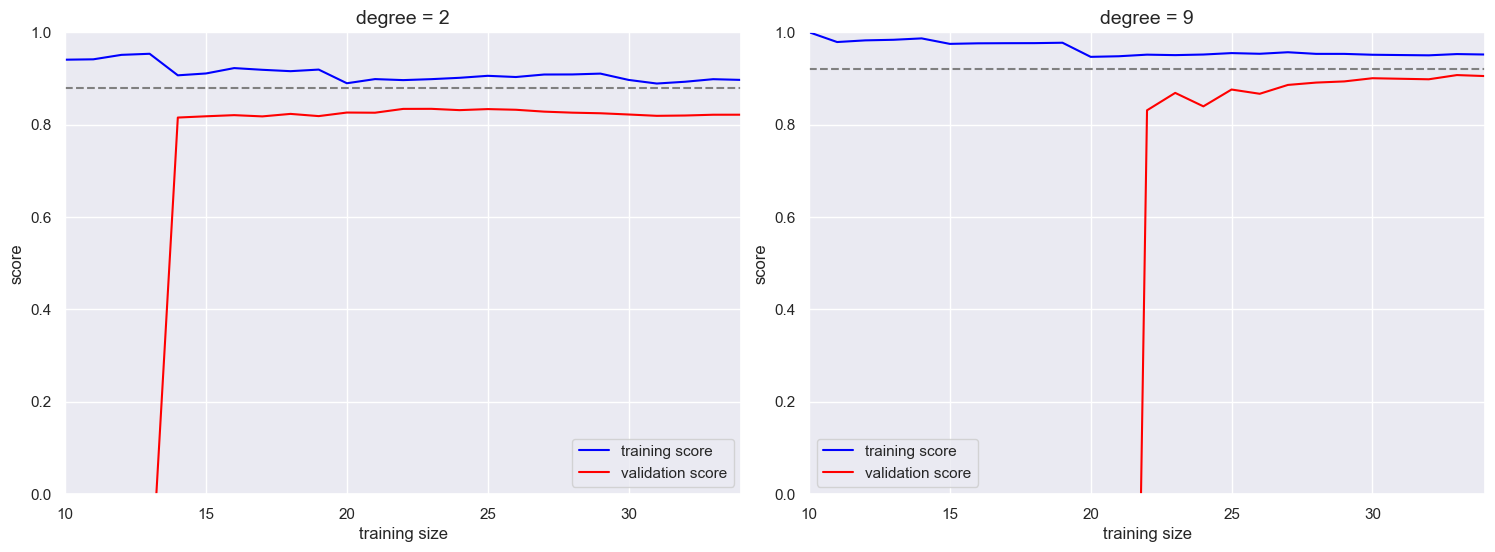

In [27]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.median(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.median(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [33]:
grid.fit(X,y);

In [34]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'polynomialfeatures__degree': np.int64(4)}

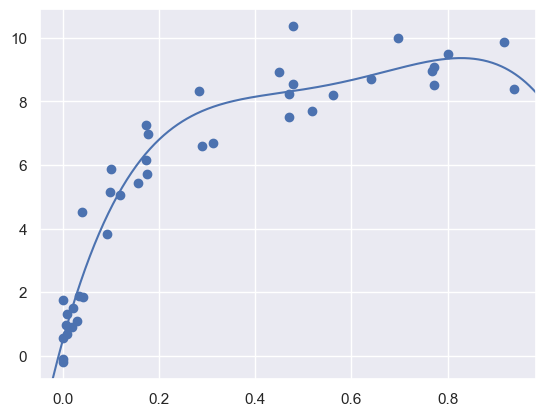

In [36]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

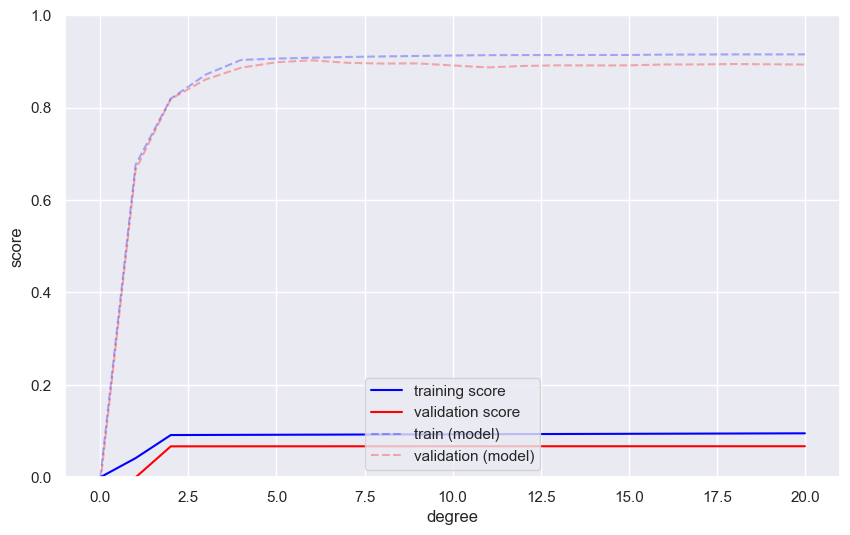

In [44]:
import pandas as pd

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df2023 = df[df['service_date'].dt.year == 2023]
df2024 = df[df['service_date'].dt.year == 2024]

X_csv23 = df2023[['service_date']].apply(lambda x: x.astype(np.int64) // 10**9)
y_csv23 = df2023['total_rides'].values

X_csv24 = df2024[['service_date']].apply(lambda x: x.astype(np.int64) // 10**9)
y_csv24 = df2024['total_rides'].values

degree = np.arange(21)
train_score_csv = validation_curve(
    PolynomialRegression(), X_csv23, y_csv23,
    param_name='polynomialfeatures__degree', param_range=degree, cv=7
)

val_score_csv = validation_curve(
    PolynomialRegression(), X_csv24, y_csv24,
    param_name='polynomialfeatures__degree', param_range=degree, cv=7
)

plt.figure(figsize=(10, 6))
plt.plot(degree, np.median(train_score_csv[0], 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score_csv[1], 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score2, 1), color='blue', alpha=0.3, linestyle='dashed', label='train (model)')
plt.plot(degree, np.median(val_score2, 1), color='red', alpha=0.3, linestyle='dashed', label='validation (model)')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

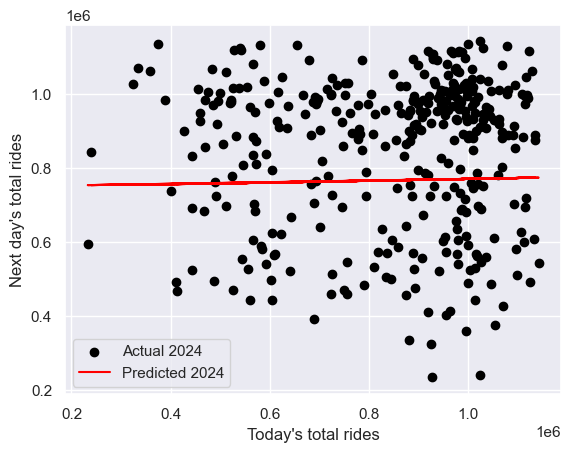

In [56]:
# Prepare X and y for 2023 data
rides_23 = df2023['total_rides'].values
X_train = rides_23[:-1].reshape(-1, 1)
y_train = rides_23[1:]

# Prepare X and y for 2024 data
rides_24 = df2024['total_rides'].values
X_test = rides_24[:-1].reshape(-1, 1)
y_test = rides_24[1:]

# Fit polynomial regression on 2023 data and predict on 2024 data
degree = 3  # example degree
model = PolynomialRegression(degree)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot results
plt.scatter(X_test.ravel(), y_test, color='black', label='Actual 2024')
plt.plot(X_test.ravel(), y_pred, color='red', label='Predicted 2024')
plt.xlabel("Today's total rides")
plt.ylabel("Next day's total rides")
plt.legend()
plt.show()
